<a href="https://colab.research.google.com/github/EduGod0y/Quantum-Mechanics/blob/main/Atividade_1_Qu%C3%A2ntica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 '%matplotlib inline

#initial imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as spy
import matplotlib.animation as animation
import scipy.integrate as sci 

#**Área, Média e Desvio Padrão:**


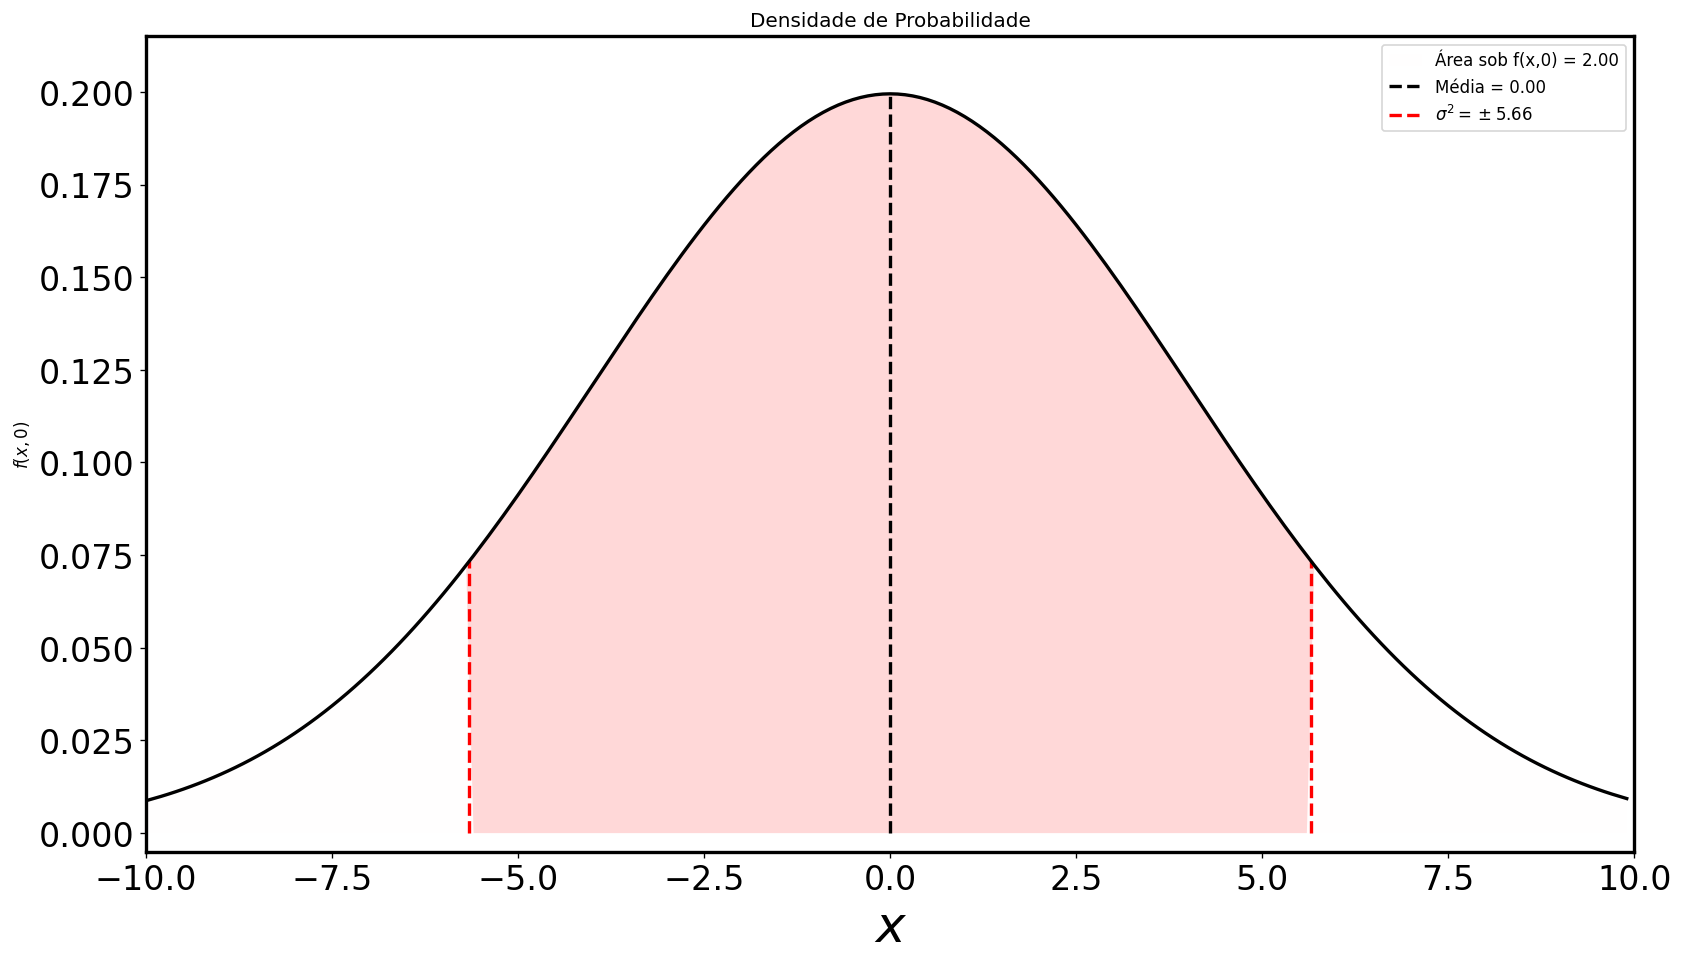

In [ ]:
#--------------------------- FUNCTION ------------------------------------------
def f(x,t):
    return (2*np.pi*(2+10*t)**2)**-0.5*np.exp(-(((x)/2)-(60)*t)**2/(2*(2+10*t)**2))
x = np.arange(-10,10,0.1)


area, _ = sci.quad(lambda x :f(x,0),-np.inf,np.inf)
xmean, _ = sci.quad(lambda x :x*f(x,0),-np.inf,np.inf)
x2mean, _ = sci.quad(lambda x :x**2*f(x,0),-np.inf,np.inf)
x2arange = np.arange(-np.sqrt(x2mean-xmean**2), np.sqrt(x2mean-xmean**2), 0.0566)
x2 = round(np.sqrt(x2mean-xmean**2),2)
std_y = f(x2, 0)



#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)
line = ax.plot(x,f(x,0)  , color='k', lw=2)[0]
ax.set(xlim=(-10,10), ylim=(-0.005, 0.215))
plt.title('Densidade de Probabilidade')
plt.xlabel('$x$')
plt.ylabel('$f(x,0)$')

#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.xlabel("$x$", fontsize=30)
plt.gca().fill_between(x, 
                       f(x,0), 0, 
                       facecolor='r',
                       alpha=0.005, label='Área sob f(x,0) = %.2f'%area)
plt.gca().fill_between(x, 
                       f(x,0), 0, 
                       facecolor='r', 
                       alpha=0.15, where= std_y < f(x,0), interpolate=True)
plt.vlines(xmean, 0, 0.2, linestyle='--', label='Média = %.2f'%xmean, color='k', lw=2)
plt.vlines(x2, 0, std_y, linestyle='--', color='r', lw=2)
plt.vlines(-x2, 0, std_y, linestyle='--', color='r', lw=2, label='$\sigma^2 = \pm 5.66$')
ax.legend(loc='best')



plt.show()


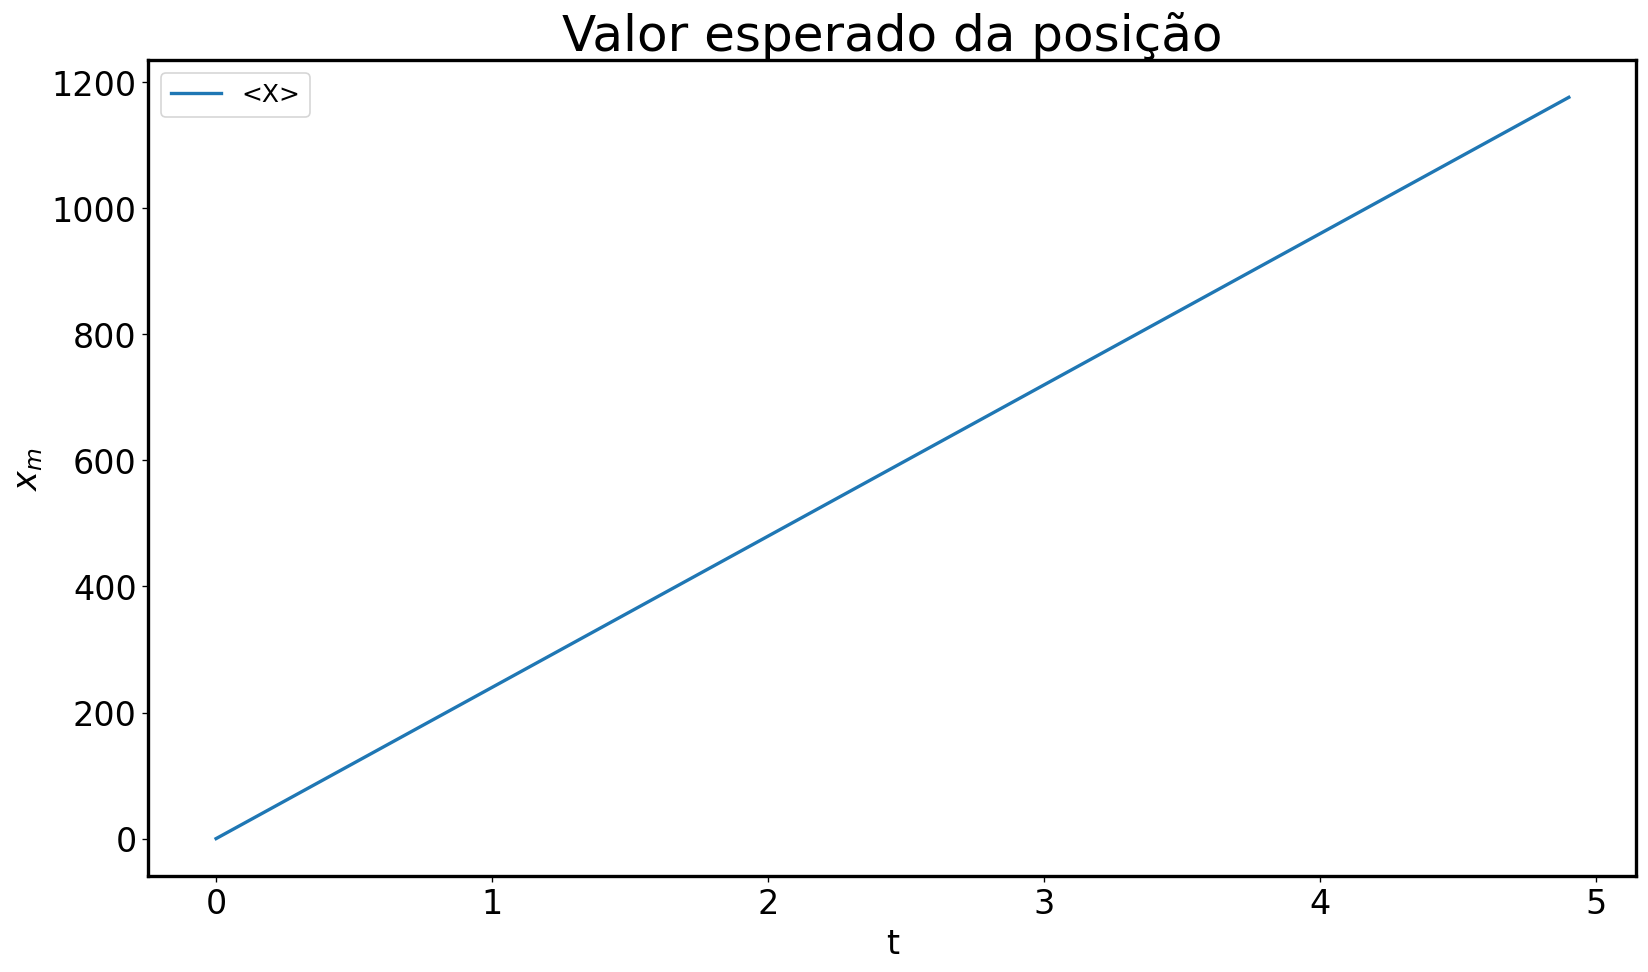

In [ ]:
t_array = np.arange(0,5,0.1)
xm=[]
for t in t_array:
    xmean,err = sci.quad(lambda x :x*f(x,t),-np.inf,np.inf)
    xm.append(xmean)
#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)

#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.xlabel("$x$", fontsize=30)




plt.plot(t_array,xm, lw=2, label='<X>')
plt.title('Valor esperado da posição', fontsize=30)
plt.xlabel('t', fontsize=20)
plt.ylabel('$x_{m}$', fontsize=20)
plt.legend(loc='best', markerscale=1, fontsize=15)
plt.show()

#**Animação:**

In [ ]:
#------------------- ANIMATION FUNCTION IMPORT ---------------------------------
from matplotlib.animation import   FuncAnimation

#---------------------- X-RANGE OF VALUES -------------------------------------- 
xvals = np.arange(0, 150.1, 0.01)

#-------------------- Y-RANGE OF VALUES (TIME) ---------------------------------
time = np.arange(0, 150.1,0.01)

#------------------- 2D ARRAY WITH X N' Y VALUES -------------------------------    
X, T = np.meshgrid(xvals, time)




#--------------- 2D ARRAY WITH FUNCTIONS RESULTS -------------------------------
F2 = (2*np.pi*(2+10*T)**2)**-0.5*np.exp(-(((X)/2)-(60)*T)**2/(2*(2+10*T)**2))

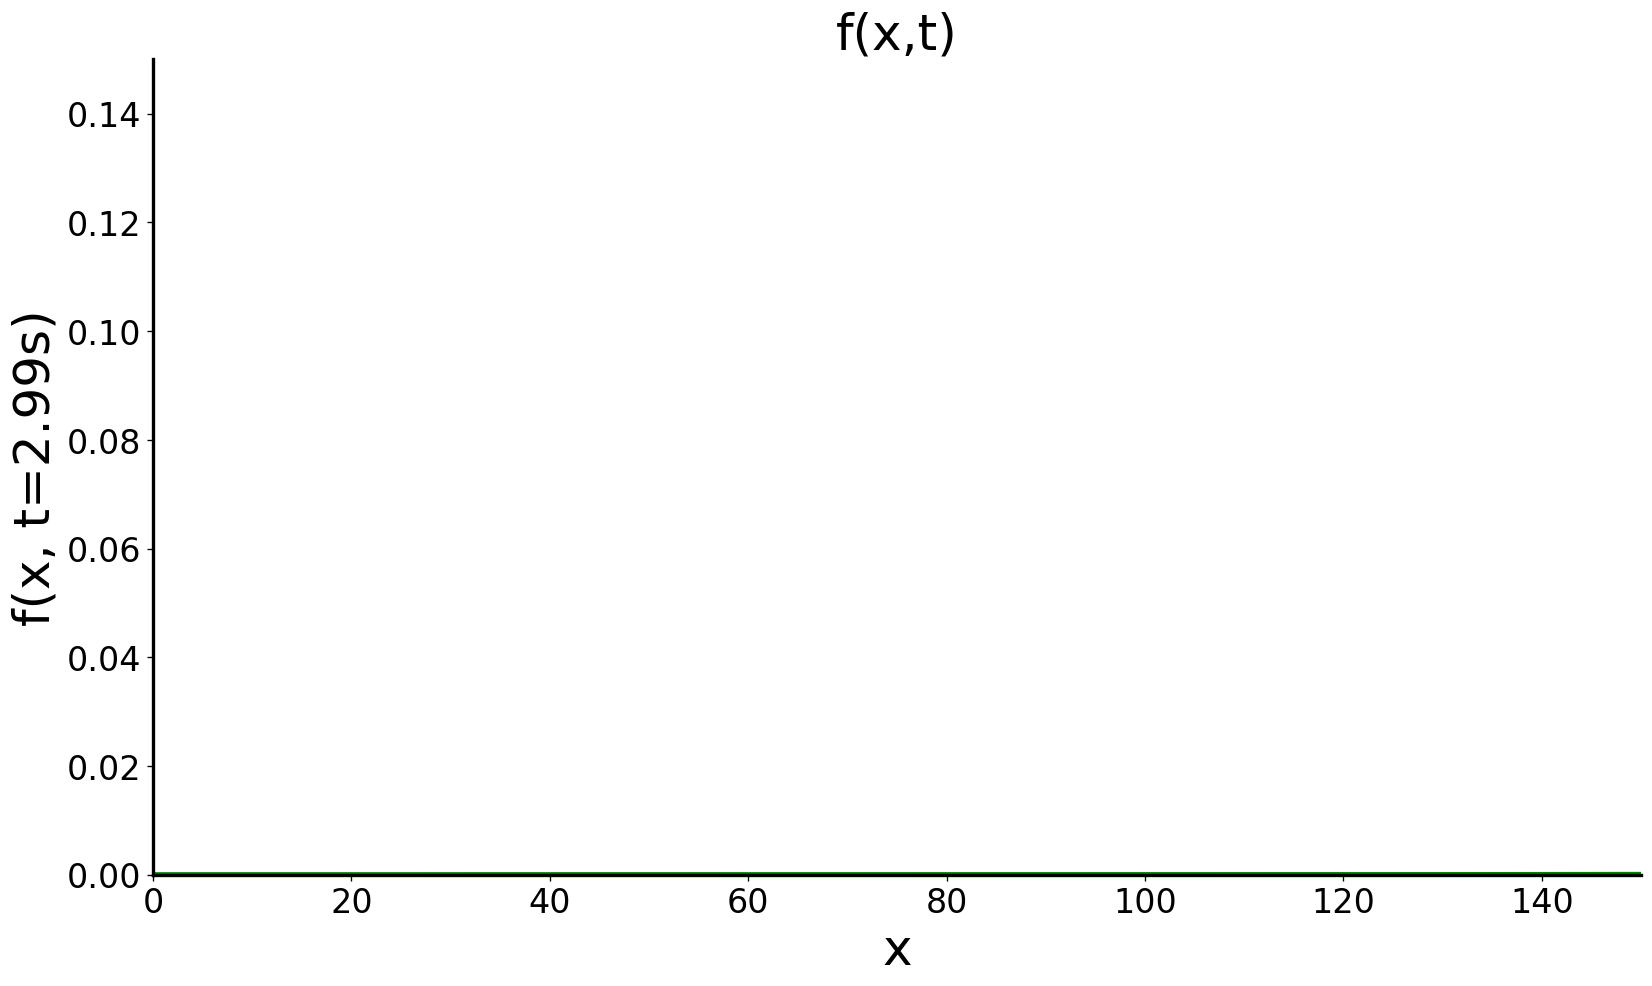

In [ ]:
#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)
ax.set(xlim=(0,150), ylim=(0, 0.15))
line = ax.plot(xvals, F2[0,:], color='g', lw=3)[0]



#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
plt.xlabel("x", fontsize=30)
plt.ylabel("f(x, t=0s)", fontsize=30)
plt.title("f(x,t)", fontsize=30)

#------------------------ .MP4 CONFIGS -----------------------------------------
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, bitrate=1000)



#------------------ FUNCTION TO ANIMATE THE CHART ------------------------------
def animate(i):
  line.set_ydata(F2[i, :])
  ax.set_ylabel('f(x, t={}s)'.format(i/100))
  #ax.set_title('f(x,t) in frame {}'.format(i))



#--------------------------- PLOTTING ------------------------------------------
anim = FuncAnimation(fig, animate, interval=100, frames=300)


plt.draw()
anim.save('animation.mp4', writer=writer)
#------------------ SAVING THE FILE [XXXXXX].mp4 -------------------------------


plt.show()






